In [92]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import brown
from nltk.tokenize import RegexpTokenizer

import pandas as pd
from pandas import Series, DataFrame
%pylab inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [93]:
jobs = pd.read_csv("Jobs.csv")
#take subset of 1000
jobs_sample = jobs.sample(1000)

In [94]:
tokenizer = RegexpTokenizer(r'\w+')
jobs_sample['tokenized_strip'] = jobs_sample.apply(lambda row: row['FullDescription'].decode('utf-8').strip(),axis=1)
jobs_sample['tokenized'] = jobs_sample.apply(lambda row: tokenizer.tokenize(row['tokenized_strip']),axis=1)

In [95]:
import itertools
JDT = jobs_sample['tokenized'].tolist()
job_descrip_list = list(itertools.chain(*JDT))

In [96]:
# get Parts of Speech
Job_descrip_POS = nltk.pos_tag(job_descrip_list)

# Get Most Common Parts-of-Speech

In [97]:
import nltk
from nltk import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

Most common parts of speech are

NN:Noun

NNP:Proper Noun

IN:Preposition or Subordinating Conjunction

JJ:Adjective

DT:Determiner

In [98]:
words, pos = zip(*Job_descrip_POS) # Unzip by using *
pos_freq = FreqDist(pos)
pos_freq.most_common()[:5] #Most frequent POS's

[('NN', 44563), ('NNP', 36526), ('IN', 26158), ('JJ', 20402), ('DT', 19940)]

# Frequency of Most Common POS

So the most common POS is nouns and they occur about 17% of the time

In [99]:
for a, b in pos_freq.most_common()[:5]:
    print a, b * 1.0 / len(pos) * 1.0 #Most common POS' frequencies

NN 0.182550703977
NNP 0.149627426643
IN 0.107155292836
JJ 0.0835760487971
DT 0.0816834826494


# Zipf's Law

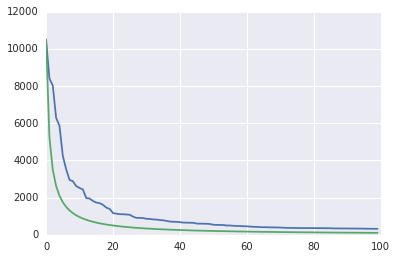

In [100]:
#get all lowercase words
words_lower = []
for word in words:
    words_lower.append(word.lower())
    
word_freq = FreqDist(words_lower)
most_common_words = word_freq.most_common()[:100]

#create theoretical Zipf's law line
n = most_common_words[0][1]
nums = []
nums.append(n)
counter = 1
while len(nums) < 100:
    counter += 1
    nums.append(n * (1.0 * 1/counter * 1.0))


plt.plot([b for (a,b) in most_common_words]) # Blue
plt.plot(nums) # Green

# Remove Stopwords

In [11]:
from nltk.corpus import stopwords

In [12]:
word_list = words
word_list_lower = [word.lower() for word in word_list]
filtered_words = [word for word in word_list_lower if word not in stopwords.words('english')]

In [13]:
filtered_words

[u'marketing',
 u'manager',
 u'motor',
 u'finance',
 u'warwickshire',
 u'plus',
 u'bonus',
 u'car',
 u'second',
 u'car',
 u'benefits',
 u'client',
 u'leading',
 u'motor',
 u'manufacturer',
 u'looking',
 u'recruit',
 u'marketing',
 u'manager',
 u'develop',
 u'two',
 u'group',
 u'businesses',
 u'looking',
 u'someone',
 u'either',
 u'marketing',
 u'background',
 u'motor',
 u'finance',
 u'industry',
 u'experienced',
 u'account',
 u'manager',
 u'used',
 u'dealing',
 u'large',
 u'dealer',
 u'groups',
 u'wants',
 u'expand',
 u'skill',
 u'set',
 u'primary',
 u'purpose',
 u'role',
 u'responsibility',
 u'development',
 u'ongoing',
 u'performance',
 u'marketing',
 u'activities',
 u'appointed',
 u'brands',
 u'putting',
 u'together',
 u'various',
 u'marketing',
 u'campaigns',
 u'ideal',
 u'person',
 u'must',
 u'full',
 u'understanding',
 u'costing',
 u'finance',
 u'insurance',
 u'propositions',
 u'numerically',
 u'strong',
 u'real',
 u'passion',
 u'leasing',
 u'side',
 u'motor',
 u'industry',
 u're

In [14]:
from nltk.stem import *
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

In [15]:
stem_freq = FreqDist(stemmed_words)
stem_freq.most_common()[:10]

[(u'manag', 2233),
 (u'work', 2171),
 (u'experi', 1823),
 (u'develop', 1553),
 (u'team', 1329),
 (u'busi', 1300),
 (u'role', 1255),
 (u'client', 1251),
 (u'requir', 1117),
 (u'skill', 1067)]

# This script would find the 10 most common lemmatized words instead of stemmed, but the function does not recognize the nltk parts-of-speech

In [16]:
#from nltk.stem import WordNetLemmatizer
#lem_words_POS = nltk.pos_tag(filtered_words)
#nwords, npos = zip(*lem_words_POS)

#wordnet_lemmatizer = WordNetLemmatizer()
#lem_words = []
#lem_words = wordnet_lemmatizer.lemmatize(nwords, pos=npos)

#lem_freq = FreqDist(lem_words)
#lem_freq.most_common()[:10]

# Part B

In [65]:
jobs_b = jobs[['FullDescription', 'SalaryNormalized']]
jobs_b_sample = jobs_b.sample(20000)

#Create new classifier for job posting salaries in the top quartile
train_sample = jobs_b_sample
sal_75 = train_sample['SalaryNormalized'].quantile(.75)

train_sample['salary_class'] = np.where(train_sample['SalaryNormalized']>=sal_75,'high','low')

train_sample.head()

,FullDescription,SalaryNormalized,salary_class
158260,A leading provider of Cloud based technology i...,62499,high
119945,"Software/Analytics Developer (C, C++ or Java) ...",45000,high
160005,A Commercial Accountant is required to join th...,42500,high
211140,As a Senior Recruitment Consultant you can be ...,24500,low
195529,Android Developer / Mobile Developer Up to **...,30000,low


In [66]:
#Create two separate lists for text and salary classifier for each job posting
descriptions = []
pay_class = []

for index, value in train_sample.iterrows():
    descriptions.append(value['FullDescription'])
    pay_class.append(value['salary_class'])

In [67]:
#Split data into test/training set
trainset_size = int(round(len(train_sample)*0.75))

X_train = np.array([''.join(el) for el in descriptions[0:trainset_size]])
y_train = np.array([el for el in pay_class[0:trainset_size]])

X_test = np.array([''.join(el) for el in descriptions[trainset_size+1:len(descriptions)]]) 
y_test = np.array([el for el in pay_class[trainset_size+1:len(pay_class)]]) 

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer= None,
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 5000)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [69]:
X_train

<15000x5000 sparse matrix of type '<type 'numpy.int64'>'
	with 1981737 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.naive_bayes import MultinomialNB

#Run Naive Bayes Classifier
nb_classifier = MultinomialNB().fit(X_train, y_train)

y_nb_predicted = nb_classifier.predict(X_test)

In [71]:
print y_nb_predicted

['high' 'low' 'high' ..., 'low' 'low' 'low']


In [91]:
from sklearn import metrics
print 'Precision:' + str(metrics.precision_score(y_test, y_nb_predicted, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, y_nb_predicted, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, y_nb_predicted))

Precision:0.541137493098
Recall: 0.780876494024
Accuracy: 0.77875575115


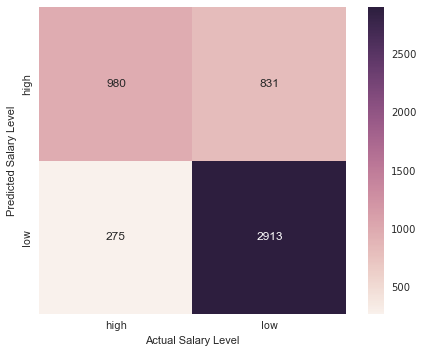

In [73]:
#Fancy boy confusion matrix
import seaborn as sns; sns.set()

mat = metrics.confusion_matrix(y_test, y_nb_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=unique(pay_class), yticklabels=unique(pay_class))
plt.xlabel('Actual Salary Level')
plt.ylabel('Predicted Salary Level');

In [74]:
def most_informative_features(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print class_labels[0], coef, feat

    print

    for coef, feat in reversed(topn_class2):
        print class_labels[1], coef, feat

In [75]:
most_informative_features(vectorizer, nb_classifier)

high -13.3328159377 avaya
high -13.1096723864 allegisgroup
high -13.1096723864 dentist
high -12.9273508296 derivatives
high -12.9273508296 gaap
high -12.9273508296 roadmaps
high -12.9273508296 websphere
high -12.7732001497 aerotek
high -12.7732001497 ifrs
high -12.7732001497 multithreading

low -3.05524215128 and
low -3.28193261127 to
low -3.30941428848 the
low -3.7002680636 of
low -3.99333504889 in
low -4.15138957587 for
low -4.32358246741 you
low -4.34337164448 with
low -4.44071994374 will
low -4.45620157666 be
